In [1]:
#Adapted from the Keras tuturial

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


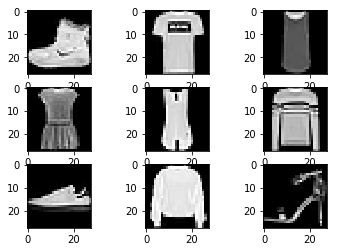

In [2]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

Create Keras model using SGD as the optimizer


In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# SCRUB
# NORMALIZE INPUTS FROM RGB COLOR TO 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# SCRUB
# THE OLD ONE HOT ENCODE - CONVERT "CATEGORICAL" CLASSIFICATION TO ENCODE
# A "BINARIZATION" OF THE CATEGORIES
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:

# MODEL
# BUILD THE BASELINE

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [7]:

# MODEL
# RUN THE MODEL

model = baseline_model()

# FIT THE MODEL

history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/300
 - 3s - loss: 1.6645 - acc: 0.5271 - val_loss: 1.2667 - val_acc: 0.6598
Epoch 2/300
 - 0s - loss: 1.1051 - acc: 0.6908 - val_loss: 1.0033 - val_acc: 0.7042
Epoch 3/300
 - 0s - loss: 0.9277 - acc: 0.7245 - val_loss: 0.8877 - val_acc: 0.7242
Epoch 4/300
 - 0s - loss: 0.8377 - acc: 0.7440 - val_loss: 0.8199 - val_acc: 0.7413
Epoch 5/300
 - 0s - loss: 0.7809 - acc: 0.7578 - val_loss: 0.7739 - val_acc: 0.7543
Epoch 6/300
 - 0s - loss: 0.7405 - acc: 0.7686 - val_loss: 0.7402 - val_acc: 0.7630
Epoch 7/300
 - 0s - loss: 0.7096 - acc: 0.7779 - val_loss: 0.7134 - val_acc: 0.7680
Epoch 8/300
 - 0s - loss: 0.6850 - acc: 0.7849 - val_loss: 0.6918 - val_acc: 0.7771
Epoch 9/300
 - 0s - loss: 0.6645 - acc: 0.7902 - val_loss: 0.6739 - val_acc: 0.7811
Epoch 10/300
 - 0s - loss: 0.6472 - acc: 0.7951 - val_loss: 0.6580 - val_a

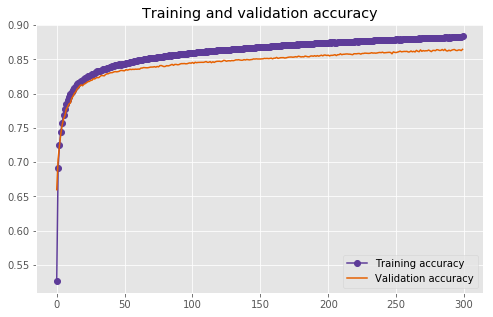

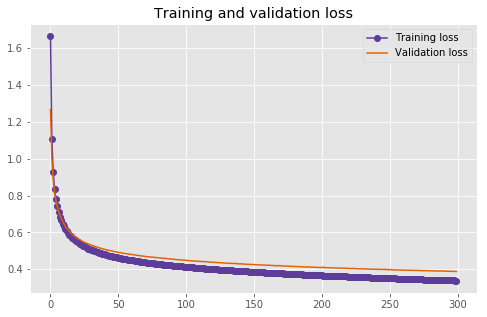

In [8]:
# INTERPRET 
# BUILD FUNCTION FOR PLOTTING THE RESULTS OF THE MODEL

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

Try a Neural net model. Imported from the Tensorflow tutorials on basic classification.

In [9]:
# reload dataset
(NN_X_train, NN_y_train), (NN_X_test, NN_y_test) = fashion_mnist.load_data()

#Explore data
print(NN_X_train.shape)
print(len(NN_y_train))
print(NN_y_train)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

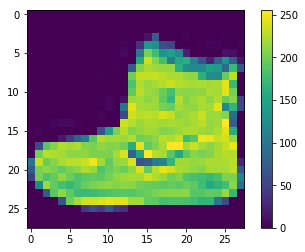

In [11]:
#Plot 1 image
plt.figure()
plt.imshow(NN_X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#Normalize images 

NN_X_train = NN_X_train/255
NN_X_test = NN_X_test/255

In [0]:
#Build model
import tensorflow as tf
from keras.layers import Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [0]:
#Build model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Run the model using 10 epochs
model.fit(NN_X_train, NN_y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.4856 - acc: 0.8273
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.3653 - acc: 0.8678
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.3281 - acc: 0.8796
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.3034 - acc: 0.8876
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2862 - acc: 0.8942
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2720 - acc: 0.8989
Epoch 7/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2593 - acc: 0.9036
Epoch 8/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2480 - acc: 0.9076
Epoch 9/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2368 - acc: 0.9111
Epoch 10/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2302 - acc: 0.9132

In [16]:
#Get accuracy
test_loss, test_acc = model.evaluate(NN_X_test, NN_y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 41us/step
Test accuracy: 0.8775


In [0]:
#Use model vs test set
predictions = model.predict(NN_X_test)

In [18]:
#Check predictions
predictions[0]

array([1.4702413e-06, 1.6417852e-09, 6.3495242e-10, 4.7142948e-13,
       5.2881732e-10, 7.5764656e-05, 4.6302873e-07, 3.4521311e-03,
       1.4280519e-09, 9.9647021e-01], dtype=float32)

In [19]:
#Verify prediction
import numpy as np
np.argmax(predictions[0])


9

In [20]:
#Check prediction
NN_y_test[0]

9

In [0]:
#Create plotting function
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

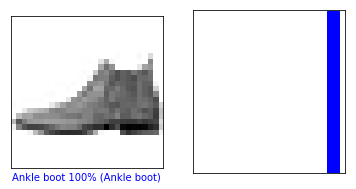

In [23]:
#Plot one to see performance
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, NN_y_test, NN_X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  NN_y_test)
plt.show()

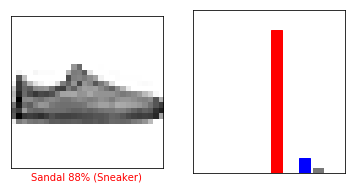

In [24]:
#Plot another to check performance
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, NN_y_test, NN_X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  NN_y_test)
plt.show()

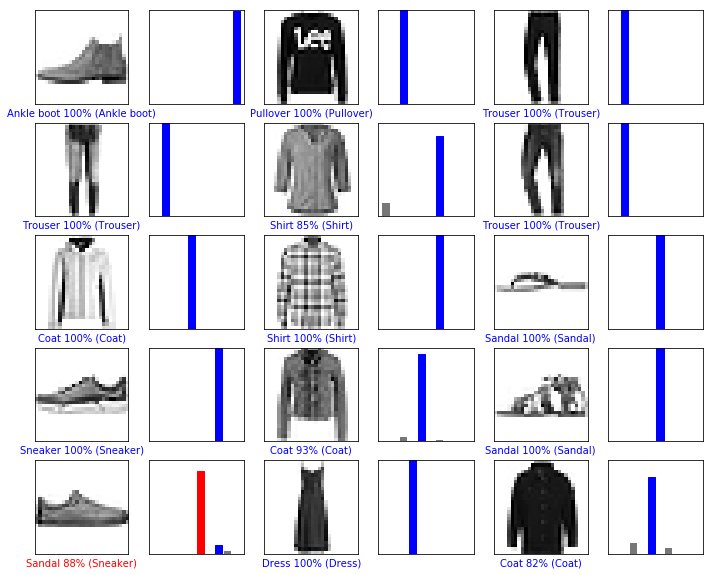

In [25]:
#Plot all categories to see performance
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, NN_y_test, NN_X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, NN_y_test)
plt.show()

In [26]:
img = NN_X_test[6]

print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.8016866e-08 1.5364614e-09 1.1948284e-04 1.1120515e-07 9.9905568e-01
  1.3303953e-11 8.2469027e-04 6.4436041e-15 9.1723164e-11 2.2826877e-14]]


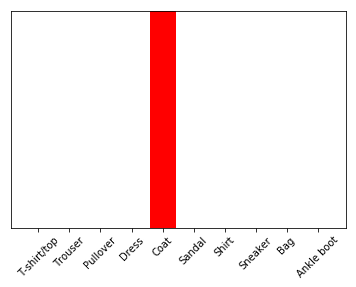

In [29]:
plot_value_array(0, predictions_single, NN_y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

Try Random Forest

In [0]:
# reload dataset
(RF_X_train, RF_y_train), (RF_X_test, RF_y_test) = fashion_mnist.load_data()

In [0]:
#Load packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [0]:
#Reshape dataset
num_pixels = RF_X_train.shape[1] * RF_X_train.shape[2]
RF_X_train = RF_X_train.reshape(RF_X_train.shape[0], num_pixels).astype('float32')
RF_X_test = RF_X_test.reshape(RF_X_test.shape[0], num_pixels).astype('float32')

In [33]:
#Create rf model
RF_model = RandomForestClassifier().fit(RF_X_train,RF_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
#Print confusion matrix for training
confusion_matrix(RF_model.predict(RF_X_train),RF_y_train)

array([[5981,    1,    1,    5,    1,    0,   59,    0,    0,    0],
       [   0, 5996,    0,    1,    1,    0,    0,    0,    1,    0],
       [   4,    0, 5986,    1,   29,    0,   48,    0,    0,    0],
       [   7,    3,    3, 5986,    7,    0,    5,    0,    1,    0],
       [   0,    0,    8,    4, 5957,    0,   42,    0,    4,    0],
       [   0,    0,    0,    0,    0, 5997,    0,    3,    0,    1],
       [   7,    0,    2,    2,    4,    0, 5846,    0,    3,    0],
       [   0,    0,    0,    0,    0,    3,    0, 5988,    0,   20],
       [   1,    0,    0,    1,    1,    0,    0,    0, 5991,    2],
       [   0,    0,    0,    0,    0,    0,    0,    9,    0, 5977]])

In [35]:
#Get training accuracy
RF_model_training_acc = (RF_model.predict(RF_X_train) == RF_y_train).mean()
print("Training Accuracy =", RF_model_training_acc)

Training Accuracy = 0.9950833333333333


In [36]:
#Print confusion matrix for test
confusion_matrix(RF_model.predict(RF_X_test),RF_y_test)

array([[849,   4,  21,  34,   3,   0, 181,   0,   4,   0],
       [  1, 958,   0,   9,   1,   0,   3,   0,   2,   0],
       [ 12,   1, 782,  11, 152,   0, 135,   0,   4,   0],
       [ 34,  23,   9, 873,  38,   2,  28,   0,   5,   0],
       [  5,   2, 127,  38, 757,   0, 101,   0,   6,   0],
       [  2,   0,   0,   0,   1, 952,   0,  25,   3,  12],
       [ 89,  12,  58,  29,  46,   0, 531,   0,  13,   0],
       [  0,   0,   0,   0,   0,  32,   0, 931,   5,  52],
       [  8,   0,   3,   6,   2,   0,  21,   0, 956,   3],
       [  0,   0,   0,   0,   0,  14,   0,  44,   2, 933]])

In [37]:
#Get test accuracy
RF_model_test_acc = (RF_model.predict(RF_X_test) == RF_y_test).mean()
print("Testing Accuracy =", RF_model_test_acc)

Testing Accuracy = 0.8522


In [0]:
#Function to print confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[849   1  12  34   5   2  89   0   8   0]
 [  4 958   1  23   2   0  12   0   0   0]
 [ 21   0 782   9 127   0  58   0   3   0]
 [ 34   9  11 873  38   0  29   0   6   0]
 [  3   1 152  38 757   1  46   0   2   0]
 [  0   0   0   2   0 952   0  32   0  14]
 [181   3 135  28 101   0 531   0  21   0]
 [  0   0   0   0   0  25   0 931   0  44]
 [  4   2   4   5   6   3  13   5 956   2]
 [  0   0   0   0   0  12   0  52   3 933]]


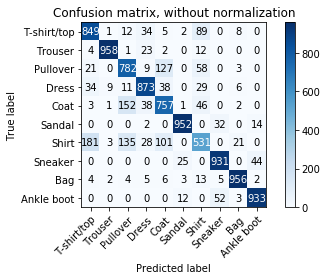

In [42]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(RF_y_test, RF_model.predict(RF_X_test), classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()